# Image Analysis with Python

In this workshop, we're going to do some simple analyses of a Landsat image.

First, let's import (load up) the libraries (packages of code) that we want to use for this task:

In [1]:
# NumPy for arrays, and Xarray for gridded geospatial datasets
import numpy as np
import xarray as xr

# To draw some images, and with nice styles
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Anaconda3\envs\remote-sensing\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [40]:
# Sample URL - full data expected mid-2017
image_url = 'http://dapds00.nci.org.au/thredds/dodsC/uc0/rs0_dev/20170215-stacked_sample/LS7_ETM_NBART_3577_15_-40.ncml'
img = xr.open_dataset(image_url)
img.attrs = {}
img

<xarray.Dataset>
Dimensions:  (time: 246, x: 4000, y: 4000)
Coordinates:
  * y        (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 ...
  * x        (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...
  * time     (time) datetime64[ns] 1999-07-16T23:49:39 1999-07-25T23:43:07 ...
Data variables:
    crs      int32 ...
    blue     (time, y, x) float64 ...
    green    (time, y, x) float64 ...
    red      (time, y, x) float64 ...
    nir      (time, y, x) float64 ...
    swir1    (time, y, x) float64 ...
    swir2    (time, y, x) float64 ...

In this workshop, we're going to do a lot:

- load a Landsat image
- slice the array (eg monochrome images, mean colour)
- view the image
- calculate NDVI
- view the NDVI

- write code to do all this for a MODIS image

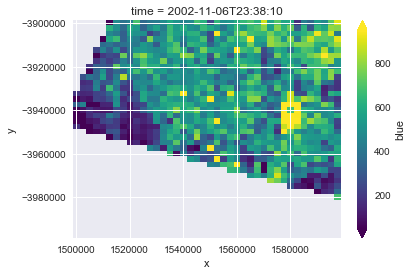

In [39]:
# Combining -11 and -12 should have full coverage
img.blue.isel(time=-12)[::100, ::100].plot.imshow(robust=True)
# TODO: illustrate and explain difference between plt.imshow(...) and (...).plot.imshow()

In [37]:
img.time

<xarray.DataArray 'time' (time: 246)>
array(['1999-07-16T23:49:39.000000000', '1999-07-25T23:43:07.000000000',
       '1999-07-25T23:43:31.000000000', ..., '2002-12-08T23:38:55.000000000',
       '2002-12-15T23:44:43.000000000', '2002-12-15T23:45:07.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-07-16T23:49:39 1999-07-25T23:43:07 ...
Attributes:
    long_name: Time, unix time-stamp
    standard_name: time
    axis: T